##### Análise Exploratória de Dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from functions.funcoes_gerais import analisar_relacao_com_target, analisar_chi_square
%matplotlib inline

In [3]:
df = pd.read_csv("../data/processed/dataset_traduzido.csv")
df_num = pd.read_csv("../data/processed/dataset_transformado.csv")

In [4]:
df = df[df['Colesterol'] != 0]
df_num = df_num[df_num['Colesterol'] != 0]

##### Análise Inicial

In [5]:
df.head()

,Idade,Sexo,TipoDorTorax,PressaoSanguineaRepouso,Colesterol,GlicemiaJejum,EletrocardiogramaRepouso,FrequenciaCardiacaMaxima,AnginaExercicio,DepressaoST,InclinacaoST,DoencaCardiaca
0,40,Masculino,AnginaTípica,140,289,0,Normal,172,Nao,0.0,Ascendente,0
1,49,Feminino,DorNaoAnginosa,160,180,0,Normal,156,Nao,1.0,Plana,1
2,37,Masculino,AnginaTípica,130,283,0,HipertrofiaVentricularEsquerda,98,Nao,0.0,Ascendente,0
3,48,Feminino,Assintomático,138,214,0,Normal,108,Sim,1.5,Plana,1
4,54,Masculino,DorNaoAnginosa,150,195,0,Normal,122,Nao,0.0,Ascendente,0


In [6]:
print(f"O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataset tem 746 linhas e 12 colunas.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Idade                     746 non-null    int64  
 1   Sexo                      746 non-null    object 
 2   TipoDorTorax              746 non-null    object 
 3   PressaoSanguineaRepouso   746 non-null    int64  
 4   Colesterol                746 non-null    int64  
 5   GlicemiaJejum             746 non-null    int64  
 6   EletrocardiogramaRepouso  746 non-null    object 
 7   FrequenciaCardiacaMaxima  746 non-null    int64  
 8   AnginaExercicio           746 non-null    object 
 9   DepressaoST               746 non-null    float64
 10  InclinacaoST              746 non-null    object 
 11  DoencaCardiaca            746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 75.8+ KB


In [8]:
desc = df.drop(columns=['GlicemiaJejum', 'DoencaCardiaca'], axis=1).describe().T

In [9]:
cols_describe = ['Idade', 'PressaoSanguineaRepouso', 'Colesterol', 'FrequenciaCardiacaMaxima', 'DepressaoST']

In [10]:
desc.loc[cols_describe, "variance"] = df[cols_describe].var()
desc.loc[cols_describe, "cv"] = desc["std"] / desc["mean"]  
desc.loc[cols_describe, "range"] = desc["max"] - desc["min"]
desc.loc[cols_describe, "skew"] = df[cols_describe].skew()
desc.loc[cols_describe, "kurtosis"] = df[cols_describe].kurtosis()

In [11]:
desc

,count,mean,std,min,25%,50%,75%,max,variance,cv,range,skew,kurtosis
Idade,746.0,52.882038,9.505888,28.0,46.00,54.0,59.0,77.0,90.361905,0.179756,49.0,-0.102932,-0.387425
PressaoSanguineaRepouso,746.0,133.022788,17.282750,92.0,120.00,130.0,140.0,200.0,298.693440,0.129923,108.0,0.620070,0.742820
Colesterol,746.0,244.635389,59.153524,85.0,207.25,237.0,275.0,603.0,3499.139363,0.241803,518.0,1.238534,4.528592
FrequenciaCardiacaMaxima,746.0,140.226542,24.524107,69.0,122.00,140.0,160.0,202.0,601.431832,0.174889,133.0,-0.165167,-0.552428
DepressaoST,746.0,0.901609,1.072861,-0.1,0.00,0.5,1.5,6.2,1.151031,1.189941,6.3,1.219448,1.362139


In [12]:
df.isnull().sum()

Idade                       0
Sexo                        0
TipoDorTorax                0
PressaoSanguineaRepouso     0
Colesterol                  0
GlicemiaJejum               0
EletrocardiogramaRepouso    0
FrequenciaCardiacaMaxima    0
AnginaExercicio             0
DepressaoST                 0
InclinacaoST                0
DoencaCardiaca              0
dtype: int64

In [13]:
df.isnull().sum() / len(df) * 100

Idade                       0.0
Sexo                        0.0
TipoDorTorax                0.0
PressaoSanguineaRepouso     0.0
Colesterol                  0.0
GlicemiaJejum               0.0
EletrocardiogramaRepouso    0.0
FrequenciaCardiacaMaxima    0.0
AnginaExercicio             0.0
DepressaoST                 0.0
InclinacaoST                0.0
DoencaCardiaca              0.0
dtype: float64

##### Outliers

In [14]:
z_scores = np.abs(stats.zscore(df[cols_describe]))

print("\n=== Relatório de Outliers (Z-Score > 3) ===\n")
for col in cols_describe:
    num_outliers = (z_scores[col] > 3).sum()
    print(f"Coluna: {col} → {num_outliers} outlier(s) encontrado(s).")


=== Relatório de Outliers (Z-Score > 3) ===

Coluna: Idade → 0 outlier(s) encontrado(s).
Coluna: PressaoSanguineaRepouso → 5 outlier(s) encontrado(s).
Coluna: Colesterol → 8 outlier(s) encontrado(s).
Coluna: FrequenciaCardiacaMaxima → 0 outlier(s) encontrado(s).
Coluna: DepressaoST → 6 outlier(s) encontrado(s).


In [15]:
Q1 = df[cols_describe].quantile(0.25)
Q3 = df[cols_describe].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = (df[cols_describe] < limite_inferior) | (df[cols_describe] > limite_superior)

In [16]:
print("\n=== Relatório de Outliers (IQR) ===\n")
for col in cols_describe:
    num_outliers = outliers[col].sum()
    print(f"Coluna: {col} → {num_outliers} outlier(s) encontrado(s).")


=== Relatório de Outliers (IQR) ===

Coluna: Idade → 0 outlier(s) encontrado(s).
Coluna: PressaoSanguineaRepouso → 20 outlier(s) encontrado(s).
Coluna: Colesterol → 23 outlier(s) encontrado(s).
Coluna: FrequenciaCardiacaMaxima → 0 outlier(s) encontrado(s).
Coluna: DepressaoST → 15 outlier(s) encontrado(s).


##### Análises Estatísticas

Text(0.5, 1.0, 'Matriz de Correlação')

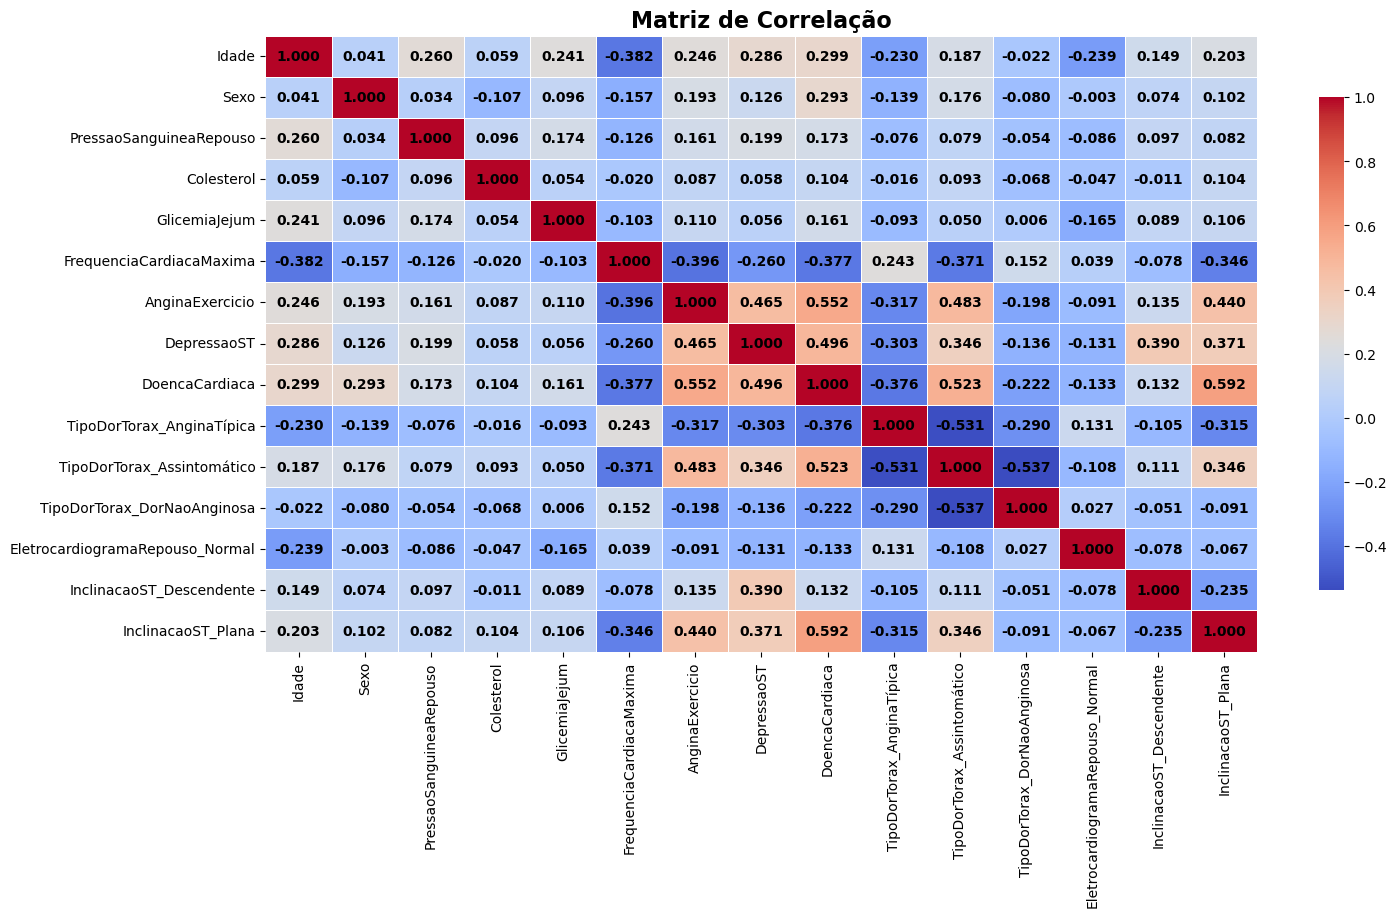

In [17]:
corr_matrix = df_num.corr(method='pearson')
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5, cbar_kws={'shrink': 0.8}, annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'})
plt.title('Matriz de Correlação', fontsize=16, weight='bold')

In [18]:
corr_matrix

,Idade,Sexo,PressaoSanguineaRepouso,Colesterol,GlicemiaJejum,FrequenciaCardiacaMaxima,AnginaExercicio,DepressaoST,DoencaCardiaca,TipoDorTorax_AnginaTípica,TipoDorTorax_Assintomático,TipoDorTorax_DorNaoAnginosa,EletrocardiogramaRepouso_Normal,InclinacaoST_Descendente,InclinacaoST_Plana
Idade,1.000000,0.040917,0.259865,0.058758,0.241338,-0.382112,0.245908,0.286006,0.298617,-0.229820,0.186737,-0.022271,-0.238592,0.148987,0.202548
Sexo,0.040917,1.000000,0.034363,-0.107045,0.096075,-0.157002,0.192579,0.125743,0.292779,-0.138835,0.176468,-0.080302,-0.002763,0.073531,0.102288
PressaoSanguineaRepouso,0.259865,0.034363,1.000000,0.095939,0.173765,-0.125774,0.161035,0.198575,0.173242,-0.076092,0.079102,-0.054299,-0.086085,0.096915,0.081746
Colesterol,0.058758,-0.107045,0.095939,1.000000,0.054012,-0.019856,0.086768,0.058488,0.103866,-0.015945,0.093470,-0.068441,-0.046950,-0.010734,0.103996
GlicemiaJejum,0.241338,0.096075,0.173765,0.054012,1.000000,-0.102710,0.109995,0.055568,0.160594,-0.093325,0.050270,0.005850,-0.165081,0.089243,0.105542
FrequenciaCardiacaMaxima,-0.382112,-0.157002,-0.125774,-0.019856,-0.102710,1.000000,-0.396289,-0.259533,-0.377212,0.243329,-0.371491,0.152321,0.039154,-0.077855,-0.346152
AnginaExercicio,0.245908,0.192579,0.161035,0.086768,0.109995,-0.396289,1.000000,0.465491,0.551834,-0.317049,0.483025,-0.197576,-0.090978,0.135442,0.440354
DepressaoST,0.286006,0.125743,0.198575,0.058488,0.055568,-0.259533,0.465491,1.000000,0.495696,-0.303200,0.346352,-0.135819,-0.130778,0.390171,0.370642
DoencaCardiaca,0.298617,0.292779,0.173242,0.103866,0.160594,-0.377212,0.551834,0.495696,1.000000,-0.375634,0.522982,-0.222146,-0.133255,0.132193,0.591554
TipoDorTorax_AnginaTípica,-0.229820,-0.138835,-0.076092,-0.015945,-0.093325,0.243329,-0.317049,-0.303200,-0.375634,1.000000,-0.530697,-0.289531,0.131242,-0.104655,-0.314773


In [19]:
correlacoes = df_num.corr(method='pearson')['DoencaCardiaca'].sort_values(ascending=False)
correlacoes = correlacoes.drop('DoencaCardiaca')

fig = px.bar(
    x=correlacoes.index, y=correlacoes.values, labels={'x': 'Variáveis', 'y': 'Correlação'},
    title='Correlação das Variáveis com a "DoencaCardiaca"', color=correlacoes.index, color_continuous_scale='Viridis', 
    height=1000 
)

fig.update_layout(
    xaxis_tickangle=90, font=dict(size=12),
    title_font=dict(size=16, family="Arial", weight="bold"), xaxis_title_font=dict(size=12), yaxis_title_font=dict(size=12),
)

fig.show()


Análise descritiva para Idade:
Grupo DoencaCardiaca == 0: Média=50.17, Mediana=51.00
Grupo DoencaCardiaca == 1: Média=55.85, Mediana=57.00
Teste t: Estatística=-8.53, p-valor=0.0000
Há uma diferença significativa entre os grupos.


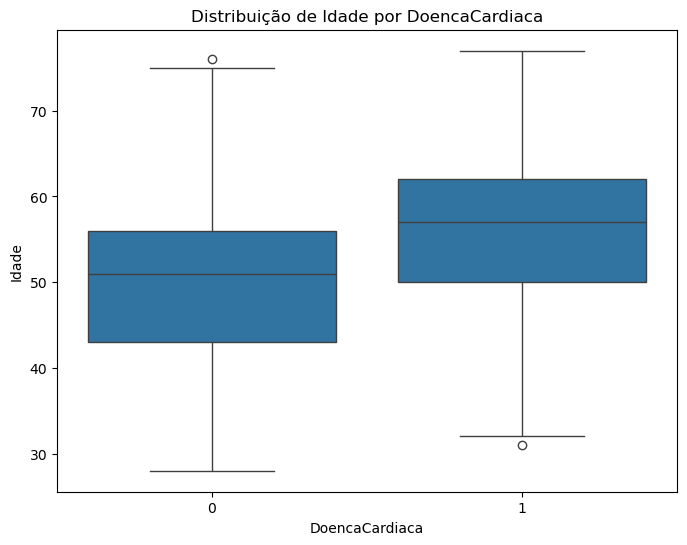


Análise descritiva para PressaoSanguineaRepouso:
Grupo DoencaCardiaca == 0: Média=130.16, Mediana=130.00
Grupo DoencaCardiaca == 1: Média=136.15, Mediana=136.00
Teste t: Estatística=-4.80, p-valor=0.0000
Há uma diferença significativa entre os grupos.


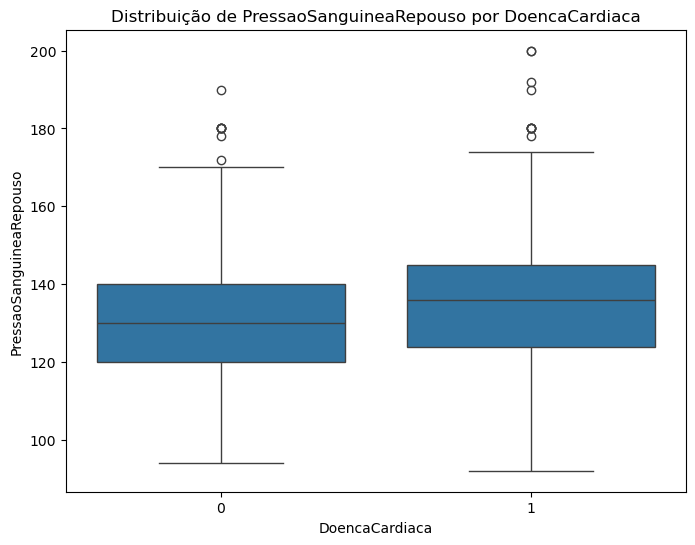


Análise descritiva para Colesterol:
Grupo DoencaCardiaca == 0: Média=238.77, Mediana=231.50
Grupo DoencaCardiaca == 1: Média=251.06, Mediana=246.00
Teste t: Estatística=-2.85, p-valor=0.0045
Há uma diferença significativa entre os grupos.


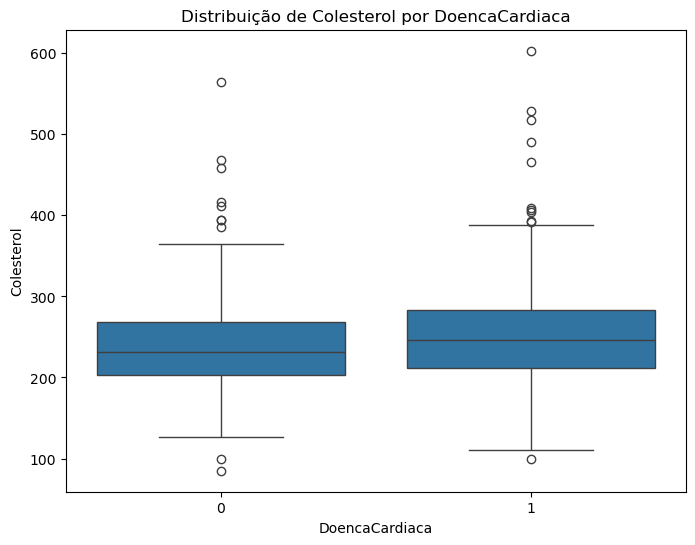


Análise descritiva para FrequenciaCardiacaMaxima:
Grupo DoencaCardiaca == 0: Média=149.06, Mediana=150.50
Grupo DoencaCardiaca == 1: Média=130.55, Mediana=130.00
Teste t: Estatística=11.11, p-valor=0.0000
Há uma diferença significativa entre os grupos.


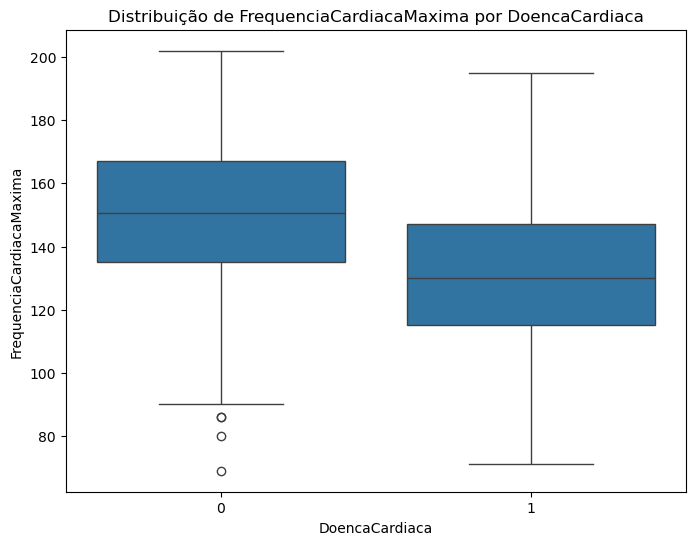


Análise descritiva para DepressaoST:
Grupo DoencaCardiaca == 0: Média=0.39, Mediana=0.00
Grupo DoencaCardiaca == 1: Média=1.46, Mediana=1.50
Teste t: Estatística=-15.57, p-valor=0.0000
Há uma diferença significativa entre os grupos.


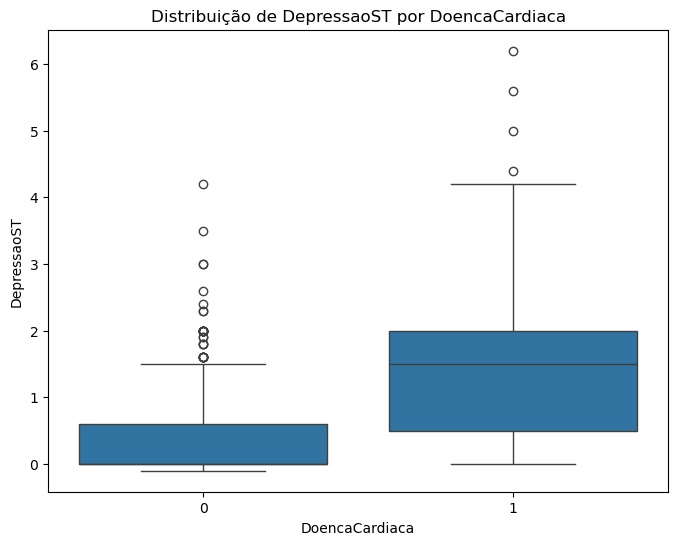

In [20]:
for coluna in cols_describe:
    analisar_relacao_com_target(df, coluna, 'DoencaCardiaca')


Teste Qui-Quadrado para Sexo e DoencaCardiaca:

Teste Qui-Quadrado para Sexo e DoencaCardiaca:
Estatística=62.59, p-valor=0.0000
Há uma associação significativa entre as variáveis.


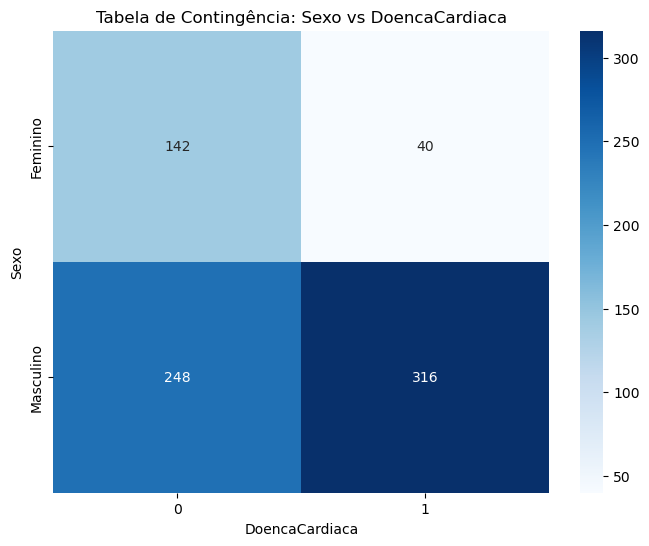


Teste Qui-Quadrado para TipoDorTorax e DoencaCardiaca:

Teste Qui-Quadrado para TipoDorTorax e DoencaCardiaca:
Estatística=215.19, p-valor=0.0000
Há uma associação significativa entre as variáveis.


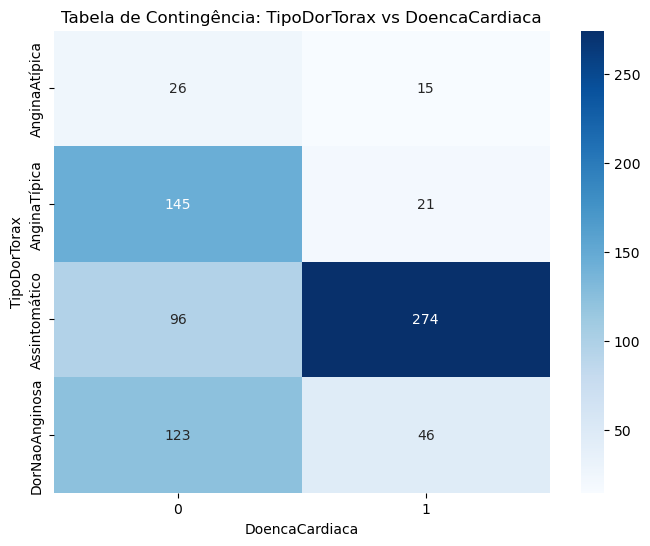


Teste Qui-Quadrado para EletrocardiogramaRepouso e DoencaCardiaca:

Teste Qui-Quadrado para EletrocardiogramaRepouso e DoencaCardiaca:
Estatística=12.71, p-valor=0.0004
Há uma associação significativa entre as variáveis.


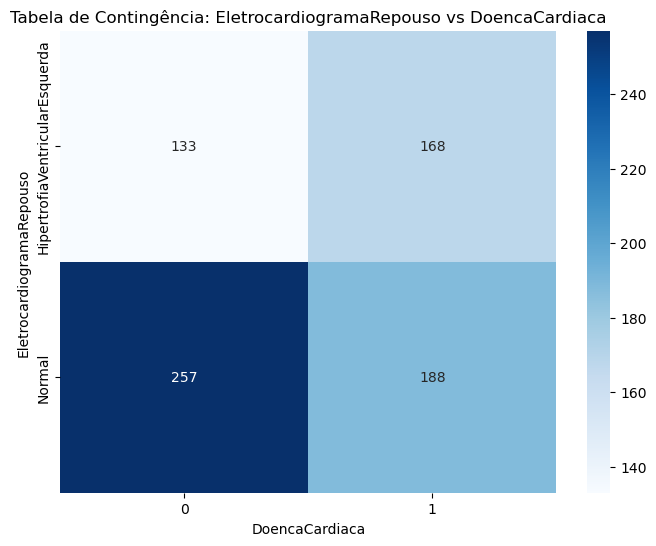


Teste Qui-Quadrado para AnginaExercicio e DoencaCardiaca:

Teste Qui-Quadrado para AnginaExercicio e DoencaCardiaca:
Estatística=224.91, p-valor=0.0000
Há uma associação significativa entre as variáveis.


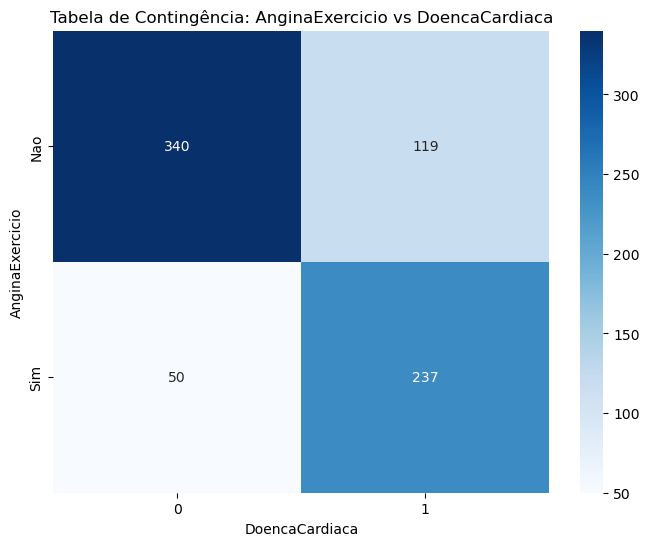


Teste Qui-Quadrado para InclinacaoST e DoencaCardiaca:

Teste Qui-Quadrado para InclinacaoST e DoencaCardiaca:
Estatística=319.14, p-valor=0.0000
Há uma associação significativa entre as variáveis.


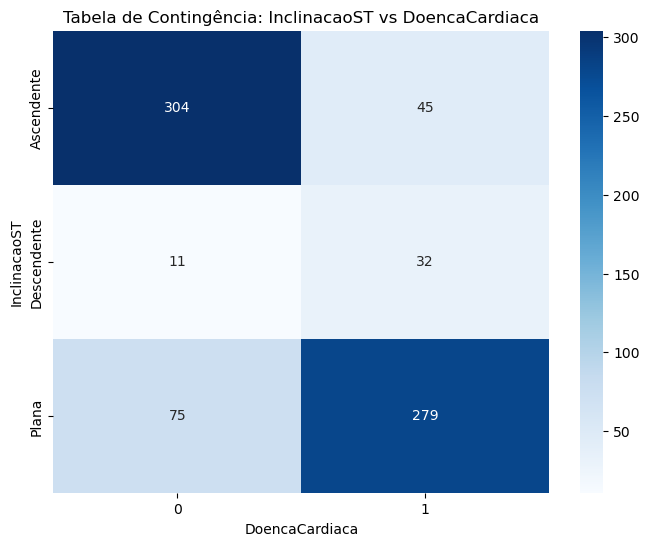

In [21]:
colunas_categoricas_chi = ['Sexo', 'TipoDorTorax', 'EletrocardiogramaRepouso', 'AnginaExercicio', 'InclinacaoST']

for cat_col in colunas_categoricas_chi:
    print(f"\nTeste Qui-Quadrado para {cat_col} e DoencaCardiaca:")
    analisar_chi_square(df, cat_col, 'DoencaCardiaca')

##### Análise Gráfica

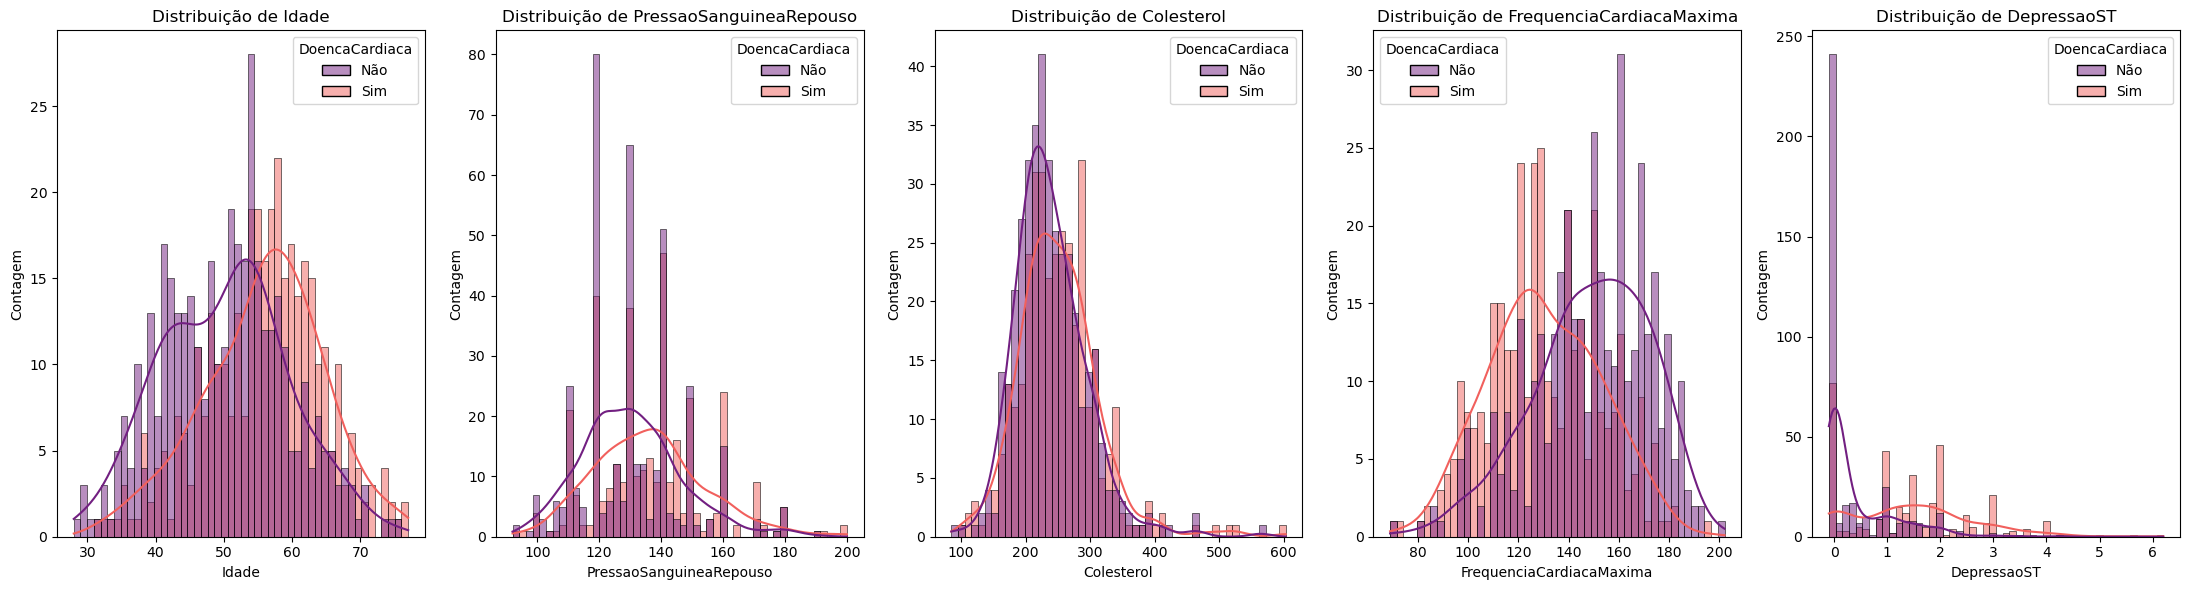

In [23]:
df['DoencaCardiaca'] = df['DoencaCardiaca'].map({0: 'Não', 1: 'Sim'})
cols = ['Idade', 'PressaoSanguineaRepouso', 'Colesterol', 'FrequenciaCardiacaMaxima', 'DepressaoST']
fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(22, 6))

for ax, col in zip(axes, cols):
    sns.histplot(
        data=df, x=col, kde=True, bins=50, ax=ax, hue='DoencaCardiaca', palette="magma", common_norm=False     
    )
    ax.set_title(f'Distribuição de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel("Contagem")

plt.tight_layout()
plt.show()

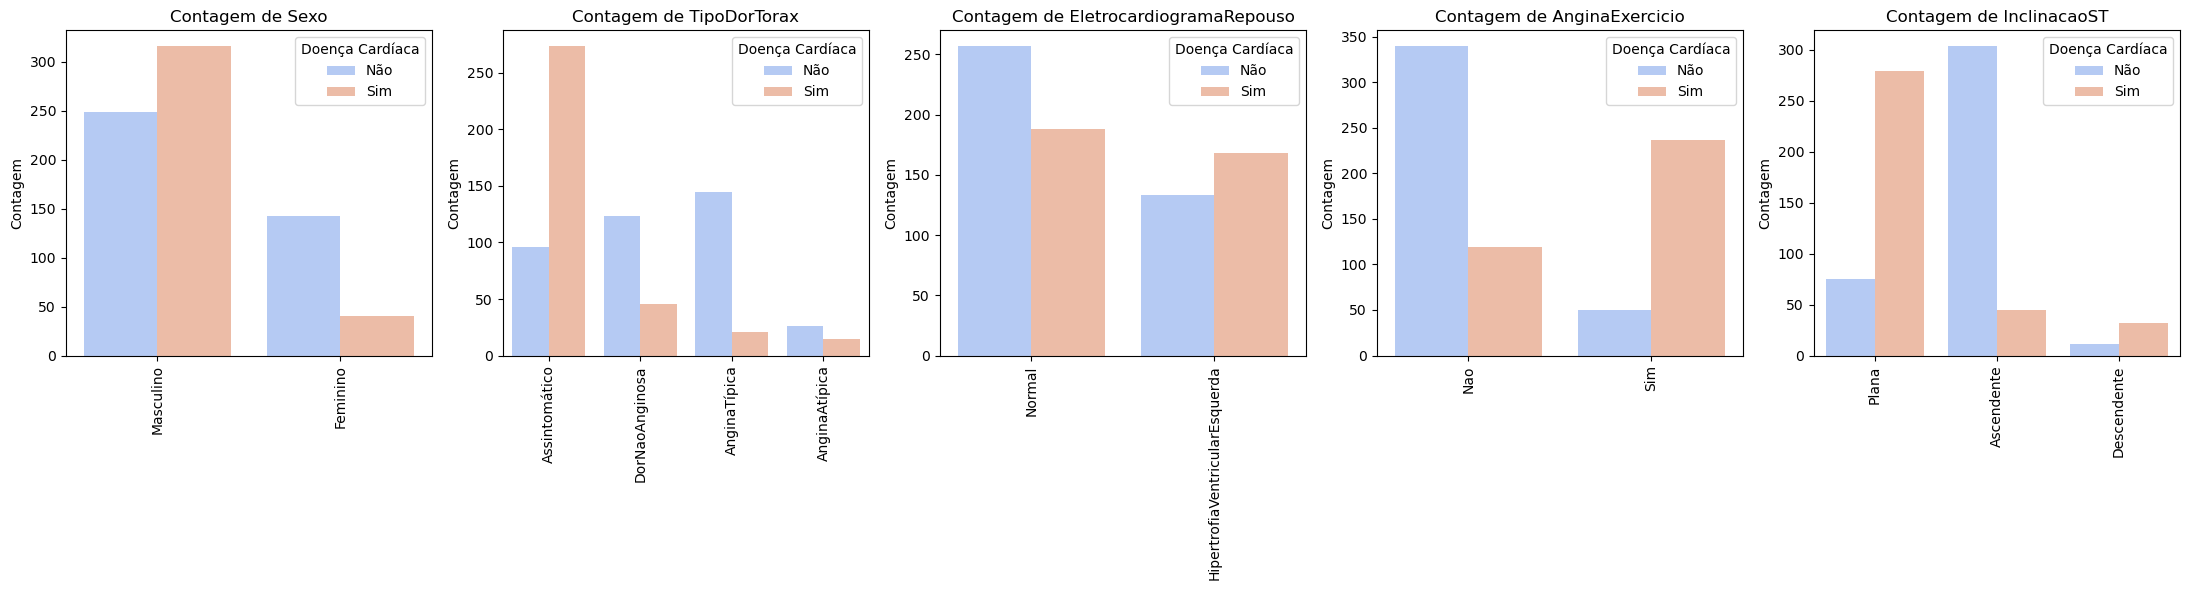

In [24]:
cols = ['Sexo', 'TipoDorTorax', 'EletrocardiogramaRepouso', 'AnginaExercicio', 'InclinacaoST']
fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(22, 6))

for ax, col in zip(axes, cols):
    sns.countplot(
        x=col,         
        data=df,             
        hue='DoencaCardiaca', palette="coolwarm", order=df[col].value_counts().index, ax=ax                
    )
    ax.set_title(f'Contagem de {col}')
    ax.set_xlabel("")
    ax.set_ylabel("Contagem")
    ax.tick_params(axis='x', rotation=90)  
    ax.legend(title='Doença Cardíaca')     

plt.tight_layout()
plt.show()

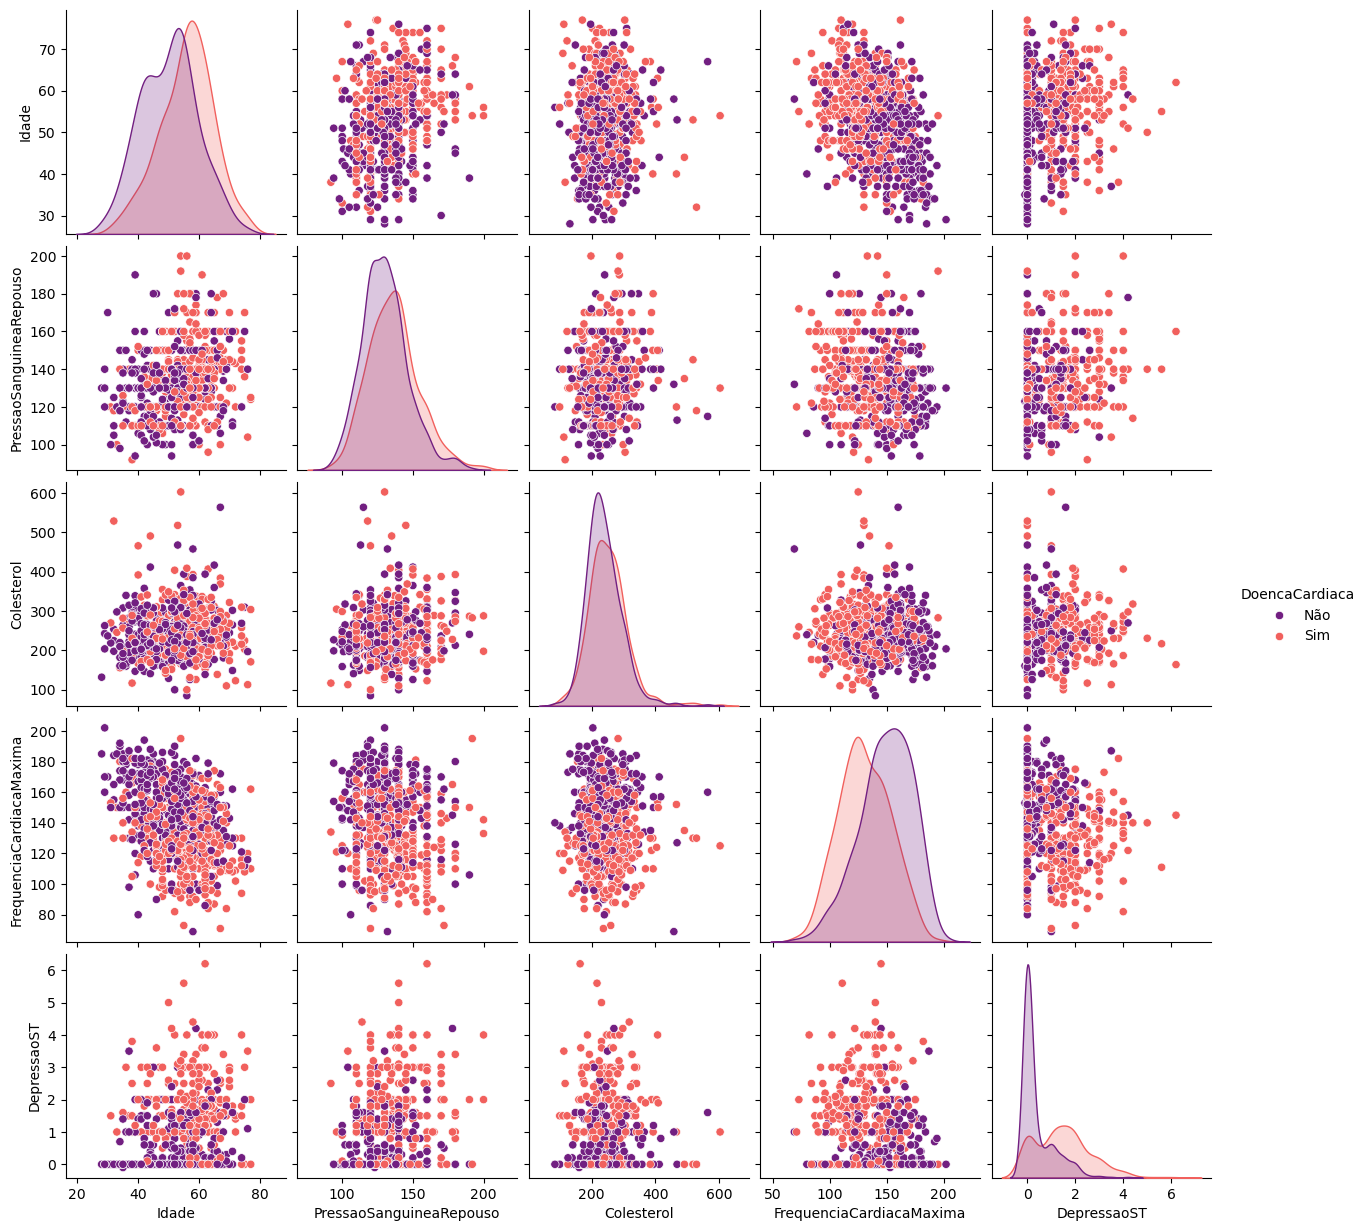

In [26]:
sns.pairplot(df[['Idade', 'PressaoSanguineaRepouso', 'Colesterol', 'FrequenciaCardiacaMaxima', 'DepressaoST', 'DoencaCardiaca']], hue='DoencaCardiaca', palette='magma')
plt.show()